In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/users/mt/Documents/TCEproject/data/data3.csv")
data = data.drop(['Unnamed: 0'], axis =1)
data = data

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
y = data['BaselineRNAlog'].values
X = data.drop(['BaselineRNAlog'],1).values


In [5]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [6]:
X = (scaler.transform(X))
X

array([[-1.0433021 , -0.96295819, -0.26904034, -1.34010951],
       [ 0.97377943,  0.01935292, -0.12737008, -1.4959953 ],
       [ 1.19704418,  0.38521369, -0.24059943, -0.78782844],
       ...,
       [ 0.6427317 , -0.22622486, -0.24059943, -0.43151807],
       [-1.01250696, -1.05818223, -0.23076294, -1.12632329],
       [ 0.08072043, -0.42669651, -0.25954732,  0.33454923]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)
X_test, X_val, y_test, y_val     = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [8]:
from sklearn.neural_network import MLPClassifier

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,learning_rate_init=0.001,momentum=0.9,
                     activation='relu',batch_size='auto',solver='adam', verbose=10, random_state=21,tol=0.0000000001)

In [10]:
history = mlp.fit(X_train,y_train)

Iteration 1, loss = 0.59407337
Iteration 2, loss = 0.56773206
Iteration 3, loss = 0.54131065
Iteration 4, loss = 0.50661975
Iteration 5, loss = 0.47548201
Iteration 6, loss = 0.44145835
Iteration 7, loss = 0.41591503
Iteration 8, loss = 0.39531048
Iteration 9, loss = 0.36948551
Iteration 10, loss = 0.35091309
Iteration 11, loss = 0.32874155
Iteration 12, loss = 0.30605980
Iteration 13, loss = 0.29121097
Iteration 14, loss = 0.27142705
Iteration 15, loss = 0.25386717
Iteration 16, loss = 0.24441953
Iteration 17, loss = 0.22784448
Iteration 18, loss = 0.21690434
Iteration 19, loss = 0.21684200
Iteration 20, loss = 0.19609300
Iteration 21, loss = 0.18872865
Iteration 22, loss = 0.18161121
Iteration 23, loss = 0.17083388
Iteration 24, loss = 0.15875205
Iteration 25, loss = 0.15663446
Iteration 26, loss = 0.14712086
Iteration 27, loss = 0.13902585
Iteration 28, loss = 0.12984548
Iteration 29, loss = 0.13653481
Iteration 30, loss = 0.11856412
Iteration 31, loss = 0.11859510
Iteration 32, los

In [11]:
history

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500, random_state=21,
              tol=1e-10, verbose=10)

In [12]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

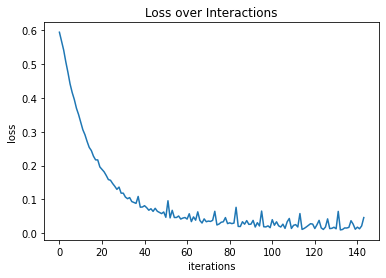

In [13]:
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Loss over Interactions")
plt.plot(mlp.loss_curve_)
plt.show()

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
predictions = mlp.predict(X_test)
accuracy_score(y_test, predictions)

0.9832651316191291

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6089
           1       0.98      0.99      0.99     10284

    accuracy                           0.98     16373
   macro avg       0.98      0.98      0.98     16373
weighted avg       0.98      0.98      0.98     16373



In [17]:
predictions

array([1, 1, 0, ..., 0, 0, 1])

In [18]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[ 5880,   209],
       [   65, 10219]])

Text(69.0, 0.5, 'Predicted Values')

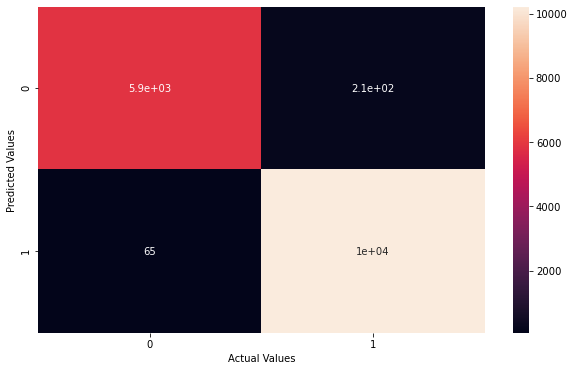

In [19]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [20]:
for i,data in enumerate(X_test):break
print(data)

[ 0.28858762 -0.44674368 -0.27782735  4.68153576]


In [22]:
for i in range(len(X_test)):
    print("X=%s, Predicted=%s" % (X_test[i], y_test[i]))

X=[ 0.28858762 -0.44674368 -0.27782735  4.68153576], Predicted=1
X=[-0.54288111  0.42530802 -0.18317379  0.4726195 ], Predicted=1
X=[0.47335844 1.10691165 2.7384642  0.17420957], Predicted=0
X=[-0.42739934 -0.84768699 -0.2755662  -0.74774352], Predicted=1
X=[ 0.24239491  1.63816154 -0.277627    0.06731645], Predicted=0
X=[-1.02020574  0.77112163 -0.24059943  1.40348035], Predicted=1
X=[-0.56597746 -0.4918498   0.47926756  1.67962088], Predicted=1
X=[ 0.26549126  0.07448263 14.84245164  0.77548332], Predicted=0
X=[ 1.4357065   0.17471845 -0.15847285  2.54367353], Predicted=1
X=[-0.01936376 -0.45175547 -0.20279907 -0.17764693], Predicted=0
X=[-0.78924221 -0.83265161 -0.23076294  0.65522857], Predicted=1
X=[-1.02790453 -0.61714458 -0.27380117 -0.2711784 ], Predicted=1
X=[-0.61217017 -1.06319402 -0.03892753 -0.05739218], Predicted=1
X=[ 5.49296592  4.21923409 -0.25461476  1.13179369], Predicted=0
X=[-0.95091668  0.41027265 -0.25954732 -0.05739218], Predicted=0
X=[ 0.8890928   0.41528444 -0

X=[ 0.91988794  0.98662866 -0.15847285 -1.07733061], Predicted=1
X=[-0.75844707  0.21982458 -0.27707364 -0.29790168], Predicted=1
X=[-0.15794188 -0.07085932 -0.08821493  1.76869848], Predicted=1
X=[-0.38890542  0.03438829  0.02312536 -0.40034091], Predicted=1
X=[-1.05869967 -1.39397225  0.32340069  0.96254626], Predicted=1
X=[-0.61986895 -0.90782848 -0.25954732 -1.01943018], Predicted=1
X=[-0.06555647 -0.44674368 -0.27256087  0.57951261], Predicted=0
X=[-1.02020574 -0.07587112 -0.12737008 -0.88581379], Predicted=1
X=[ 0.86599645  0.32507219 -0.23076294 -0.28899392], Predicted=1
X=[ 1.13545391 -0.26631919 -0.27380117  0.16084793], Predicted=1
X=[-0.63526652 -0.75246295 -0.27667292 -0.39588703], Predicted=1
X=[-1.03560331 -1.26366567 -0.15847285 -1.42918711], Predicted=1
X=[ 4.34584703  2.32477695 -0.27782735  0.82892987], Predicted=0
X=[-0.40430299 -0.52693234  2.11794481  0.69531348], Predicted=1
X=[-0.87392884  0.51050848 -0.27256087  1.97803082], Predicted=1
X=[-0.88162762 -1.3338307

X=[-0.71225437 -1.08825297  0.10124484 -0.57849609], Predicted=1
X=[-0.32731514 -0.97298177 -0.21837908  0.2098406 ], Predicted=1
X=[-0.79694099  0.0293765  -0.27782735 -0.29790168], Predicted=1
X=[-0.61986895 -0.11095366 -0.27100573  0.65968245], Predicted=0
X=[-0.19643581 -0.88778132 -0.27667292 -0.0306689 ], Predicted=1
X=[-0.82003735  0.77112163 -0.27256087 -0.93926034], Predicted=0
X=[ 1.85144086  1.42265451 -0.26904034  0.12521689], Predicted=0
X=[-0.77384464 -1.16844164  0.67549171  0.37908803], Predicted=1
X=[-0.85083249  1.33244226 -0.27478386  0.1875712 ], Predicted=0
X=[ 1.72826031  1.91381006 -0.12737008  1.44356526], Predicted=1
X=[-1.08179602 -0.68730966 -0.24841329  0.33900311], Predicted=0
X=[ 2.36725942  1.40761913 -0.20279907 -1.13523105], Predicted=0
X=[ 0.1500095   0.87636925 -0.27256087 -0.95707586], Predicted=0
X=[-0.73535072 -0.97799356 -0.27810403 -0.38697927], Predicted=1
X=[-0.38890542  0.03438829  0.02312536 -0.40034091], Predicted=1
X=[-0.78154343 -0.7674983

X=[-0.09635161 -0.26631919 -0.27256087 -1.46927202], Predicted=1
X=[ 0.38097303 -0.05582395 -0.27782735 -0.30235556], Predicted=0
X=[-0.92782033  0.7310273  -0.27478386 -0.43597195], Predicted=1
X=[-0.95861547 -0.12097724 -0.27256087  0.23211   ], Predicted=1
X=[ 2.23638009  1.23220643 -0.25461476  0.78884496], Predicted=1
X=[-0.24262851 -0.51189697 -0.08821493  1.48810406], Predicted=0
X=[ 1.06616485  0.25991891 -0.27478386 -0.64975817], Predicted=1
X=[-0.92782033 -0.92286386 -0.24841329 -0.11083873], Predicted=1
X=[-0.81233856 -1.14338268 -0.24841329 -0.9927069 ], Predicted=1
X=[ 2.10550075  1.37253659 -0.26345902  0.41471907], Predicted=1
X=[ 0.07302165 -0.65222712  0.67549171  0.96700014], Predicted=1
X=[ 2.36725942  1.40761913 -0.20279907 -1.13523105], Predicted=0
X=[-0.35811028  0.72100371 -0.23076294  0.2098406 ], Predicted=1
X=[-1.02020574 -1.40900762 -0.27782735 -1.01052242], Predicted=1
X=[-0.92782033 -0.68229787  0.02312536  0.98481566], Predicted=1
X=[ 2.29797036  0.7360390

X=[-0.00396619  0.13462412 -0.25954732 -1.43364098], Predicted=1
X=[-0.18873702  0.23485995 -0.25954732 -0.25781676], Predicted=0
X=[ 2.4288497   1.8336214  -0.27380117 -0.71656636], Predicted=0
X=[-0.40430299 -0.52693234  2.11794481  0.69531348], Predicted=1
X=[ 1.20474297  2.04411664 -0.26656929 -1.19758536], Predicted=0
X=[ 1.22014054  0.41027265  0.32340069 -0.28899392], Predicted=0
X=[ 1.72826031  0.46039056 -0.20279907  0.33009535], Predicted=1
X=[-0.9432179   0.21481278 -0.25954732 -0.33798659], Predicted=1
X=[ 2.14399467  1.06681732 -0.27478386 -0.57404221], Predicted=1
X=[ 0.1500095   1.38757197 -0.27782735 -0.58294997], Predicted=1
X=[ 1.75905545  0.93651074 -0.15847285 -0.80119008], Predicted=1
X=[-0.52748354  0.05443546 -0.03892753  2.39224163], Predicted=1
X=[-0.64296531 -0.87775774 -0.27782735 -0.25336288], Predicted=1
X=[ 0.45796087  0.34010757 -0.27478386 -0.27563228], Predicted=1
X=[ 0.68892441  0.72100371  0.19959067 -1.12186941], Predicted=1
X=[-0.08095404 -0.3064135

X=[-0.28112244  0.58067355 -0.12737008  2.41005714], Predicted=1
X=[-0.61986895 -0.11095366 -0.27100573  0.65968245], Predicted=0
X=[ 0.0499253  -0.63217996  0.92252978  0.93582298], Predicted=1
X=[ 4.3612446   3.6328545  -0.27380117  0.5394277 ], Predicted=0
X=[ 0.4425633   1.09187627 -0.20279907 -1.25103192], Predicted=1
X=[-1.05100088 -1.44409016 -0.23076294  0.69976736], Predicted=1
X=[ 3.06015002  1.58303183 -0.24059943  0.12521689], Predicted=1
X=[ 0.1962022   0.75608625 -0.15847285  0.74876004], Predicted=0
X=[ 0.55034629  1.26728897 -0.27380117 -1.38464831], Predicted=0
X=[ 0.81980374  0.27996607 -0.18317379 -0.5562267 ], Predicted=1
X=[-0.52748354 -1.15841805 -0.27380117  1.14070145], Predicted=1
X=[ 1.14315269  0.80620417 -0.27256087  1.10507041], Predicted=0
X=[-0.9432179  -0.91785207 -0.08821493 -1.41582547], Predicted=0
X=[ 1.07386363  1.40260734 -0.27782735  0.5394277 ], Predicted=0
X=[ 2.36725942  1.40761913 -0.20279907 -1.13523105], Predicted=0
X=[-0.89702519 -1.3438543

X=[-1.03560331 -1.38896046 -0.20279907  2.05374677], Predicted=1
X=[ 0.21159977  0.50048489 -0.27380117 -0.47160298], Predicted=0
X=[-0.41200177  0.24488353 -0.27256087  0.83338375], Predicted=0
X=[-0.65066409 -1.02309969 -0.25954732  0.82447599], Predicted=1
X=[ 1.30482717  0.25991891 -0.24841329 -0.73883576], Predicted=1
X=[-0.32731514 -0.51690876  1.62504219 -0.3157172 ], Predicted=0
X=[-0.77384464 -1.09326477  1.62504219  0.50379666], Predicted=0
X=[-0.92782033 -0.4317083  -0.27782735 -0.89026767], Predicted=1
X=[-0.04246012  1.0217112   0.19959067  0.2989182 ], Predicted=0
X=[ 0.4964548  -0.4367201  -0.27782735  0.0361393 ], Predicted=1
X=[-0.37350785 -0.41667293 -0.27782735 -0.11083873], Predicted=1
X=[-0.68145923 -0.42669651 -0.27667292 -0.53841118], Predicted=0
X=[-1.05869967 -0.85269878 -0.27782735 -0.91699095], Predicted=0
X=[-1.06639845 -0.53194413 -0.26656929 -0.83682111], Predicted=1
X=[ 1.99771777  2.68061414 -0.25461476  0.11185525], Predicted=0
X=[ 0.71202076  0.0043175

X=[-1.05100088 -1.03312327 -0.24059943  0.78439108], Predicted=1
X=[-1.02790453 -1.11331193 -0.18317379  0.66859021], Predicted=1
X=[ 1.09695998  0.72100371 -0.27667292  0.62405141], Predicted=1
X=[-0.58907381  0.27495428 -0.08821493 -1.43809486], Predicted=0
X=[-0.71225437 -0.74243937 -0.27380117 -0.40034091], Predicted=0
X=[-1.0433021  -0.607121   -0.23076294 -1.42918711], Predicted=1
X=[ 2.30566915  0.17471845 -0.27380117 -0.12420037], Predicted=0
X=[-0.85083249  1.0768409  -0.27618635 -0.64975817], Predicted=1
X=[0.1500095  0.4353316  5.74120792 0.28555656], Predicted=0
X=[ 0.8429001   0.93149895 -0.27810403 -1.0372457 ], Predicted=0
X=[-0.3504115  -0.71236862 -0.27256087 -0.2043702 ], Predicted=1
X=[-0.89702519 -1.34385433 -0.03892753 -0.16428529], Predicted=1
X=[-0.73535072 -1.23860672 -0.27810403 -0.85018275], Predicted=1
X=[-1.05869967  0.43031981 -0.27667292 -0.35134823], Predicted=0
X=[-0.13484553 -0.47180264 -0.24059943  0.50379666], Predicted=1
X=[-0.37350785 -0.49686159 -0

X=[ 1.07386363  0.64081505 -0.23076294  1.54155061], Predicted=0
X=[-0.57367625 -1.03813506 -0.24841329 -0.20882408], Predicted=1
X=[-1.03560331 -1.26366567 -0.27380117 -1.32674787], Predicted=1
X=[-1.02790453 -1.21354776 -0.25954732  1.15851697], Predicted=1
X=[-0.92782033 -0.74243937 -0.26904034 -0.89917543], Predicted=1
X=[ 0.56574386  1.08185269 -0.27256087 -1.09069225], Predicted=1
X=[ 0.13461193 -0.67227429 -0.27782735  1.92903814], Predicted=1
X=[ 0.28858762 -0.57203846 -0.2755662   0.39690355], Predicted=1
X=[ 1.45880285  0.65083863 -0.23076294 -1.24657804], Predicted=0
X=[ 0.22699734  0.13963591 -0.26345902 -0.72547412], Predicted=1
X=[-0.63526652 -0.75246295 -0.27667292 -0.39588703], Predicted=1
X=[ 1.54348948  0.28497786  0.32340069 -0.47160298], Predicted=0
X=[ 1.75905545  2.13432888 -0.27618635  0.57505873], Predicted=0
X=[ 3.54517345  1.85868036 -0.20279907 -0.13756201], Predicted=0
X=[ 2.45194605  0.83627491 -0.20279907 -0.2266396 ], Predicted=0
X=[-0.86623005 -0.0257532

X=[ 0.22699734  0.56062639 -0.15847285 -0.21773184], Predicted=1
X=[-0.71995315  0.08450621 -0.27667292 -0.72547412], Predicted=0
X=[-0.54288111 -1.08825297 -0.18317379  1.46583466], Predicted=1
X=[0.61193656 0.77613342 0.19959067 1.33667215], Predicted=0
X=[-0.68145923 -0.31142531 -0.08821493  1.75088296], Predicted=1
X=[-0.98941061 -0.29137815 -0.27380117  1.12288593], Predicted=0
X=[-1.05869967 -0.88276953 -0.08821493  0.05840869], Predicted=1
X=[-0.85083249 -0.42669651 -0.03892753 -0.40479479], Predicted=1
X=[ 1.09695998  0.86634566  0.02312536 -0.93926034], Predicted=0
X=[ 0.47335844 -0.15605978 -0.277627   -1.04615346], Predicted=0
X=[ 0.26549126 -0.58707384  0.10124484 -0.69429696], Predicted=1
X=[-0.24262851 -0.51189697 -0.08821493  1.48810406], Predicted=0
X=[-0.95091668 -1.37392508 -0.27782735  0.28555656], Predicted=1
X=[-0.79694099  0.0293765  -0.27782735 -0.29790168], Predicted=1
X=[-0.85083249 -0.88276953 -0.27782735 -0.03512278], Predicted=1
X=[-0.87392884 -0.63217996 -0

X=[ 0.45796087 -0.21118948 -0.27256087 -0.61412713], Predicted=1
X=[-0.18103824  0.4353316  -0.2755662  -0.35580211], Predicted=0
X=[ 0.22699734  1.27230076 -0.23076294 -1.20649312], Predicted=0
X=[-0.31191757 -0.88778132 -0.27478386 -1.00161466], Predicted=0
X=[-0.52748354  0.65083863 -0.23076294 -1.45591038], Predicted=0
X=[-0.40430299 -0.62215638 -0.25461476  1.02935446], Predicted=1
X=[ 0.1500095  -0.09591828 -0.25461476 -1.43364098], Predicted=0
X=[-0.15794188 -0.20617769 -0.15847285 -0.96152974], Predicted=0
X=[0.81980374 0.33008399 0.10124484 0.08513197], Predicted=1
X=[ 0.25009369 -0.59709742 -0.27380117  1.1718786 ], Predicted=1
X=[ 1.7359591   1.52790212 -0.12737008 -1.24212416], Predicted=1
X=[-0.15794188 -0.60210921 -0.18317379  0.15639405], Predicted=1
X=[ 0.35787668  0.57566176 -0.26345902  1.07389325], Predicted=0
X=[-0.93551912 -1.39898404 -0.08821493 -0.9704375 ], Predicted=1
X=[-0.77384464 -1.26366567  0.19959067  2.28089464], Predicted=1
X=[ 0.22699734 -0.65222712 -0

X=[-0.08865282 -0.21118948 -0.27478386 -0.59631161], Predicted=1
X=[-0.63526652  0.04441188 -0.27380117  0.29446432], Predicted=0
X=[ 1.29712838  2.92118013 -0.25954732 -0.45378746], Predicted=1
X=[-1.08179602 -1.36891329 -0.21837908  0.40581131], Predicted=1
X=[-0.33501393 -0.62215638 -0.27256087 -0.16428529], Predicted=0
X=[ 0.45026209  1.06681732 -0.21837908  1.01599282], Predicted=0
X=[ 0.95068308  1.09688807  2.7384642  -0.06184606], Predicted=0
X=[-0.42739934 -1.18347701  1.62504219 -1.08178449], Predicted=0
X=[-0.95091668 -1.37392508 -0.27782735  0.28555656], Predicted=1
X=[-1.05869967 -0.85269878 -0.27782735 -0.91699095], Predicted=0
X=[-0.35811028 -0.40664935 -0.27478386  0.30782595], Predicted=1
X=[-0.95861547 -1.26867746 -0.24059943  0.37908803], Predicted=1
X=[ 0.75821347  0.70095655 -0.27737894  0.46816562], Predicted=0
X=[-0.22723094 -0.26631919 -0.27256087  0.41026519], Predicted=1
X=[ 0.45796087  0.12460054  0.19959067 -1.44254874], Predicted=1
X=[ 1.65897125  0.4353316

X=[ 1.79754937  1.45773705  1.62504219 -1.30447848], Predicted=1
X=[ 0.43486452  0.11958875 -0.21837908 -0.76555904], Predicted=0
X=[-1.02790453 -1.35387792 -0.26345902 -0.06184606], Predicted=1
X=[ 0.20390099  0.98662866 -0.27667292  0.76657556], Predicted=0
X=[ 0.61193656  2.32477695  5.74120792 -0.47160298], Predicted=0
X=[-0.98171182 -0.54697951  0.47926756 -0.5339573 ], Predicted=1
X=[-0.61217017 -0.29137815 -0.25954732  0.14303241], Predicted=1
X=[-0.95861547 -0.34149606 -0.12737008 -0.75665128], Predicted=0
X=[ 2.3287655   0.75608625 -0.08821493 -1.0372457 ], Predicted=0
X=[-1.03560331 -1.26366567 -0.27380117 -1.32674787], Predicted=1
X=[ 0.096118   -0.29137815 -0.21837908  1.7197058 ], Predicted=0
X=[-0.4966884  -0.75747474 -0.23076294  0.92691522], Predicted=1
X=[ 1.3356223   0.10956516 -0.27737894 -0.14646977], Predicted=1
X=[-1.07409724 -1.44910195 -0.27782735 -0.69875084], Predicted=1
X=[ 0.75821347  0.70095655 -0.27737894  0.46816562], Predicted=0
X=[ 0.3963706  -0.3214488

X=[-0.35811028  0.54057922 -0.26345902 -1.01943018], Predicted=0
X=[-0.96631425 -0.99302894  0.02312536  1.59054329], Predicted=1
X=[ 1.00457457 -0.10594186 -0.18317379  1.08280101], Predicted=1
X=[ 1.99771777  2.68061414 -0.25461476  0.11185525], Predicted=0
X=[-1.05100088 -1.44409016 -0.23076294  0.69976736], Predicted=1
X=[-0.52748354 -1.10328835 -0.27380117  1.15851697], Predicted=1
X=[-0.14254431 -0.05081216  0.47926756  1.00263118], Predicted=1
X=[ 1.09695998  0.40024906 -0.08821493  0.1875712 ], Predicted=1
X=[2.93696947 1.15201777 1.62504219 1.53264286], Predicted=0
X=[-1.06639845 -1.3639015  -0.27100573 -1.20649312], Predicted=1
X=[ 1.29712838  2.92118013 -0.25954732 -0.45378746], Predicted=1
X=[-0.58907381 -1.04815864  0.19959067  0.44144234], Predicted=1
X=[-0.7430495  -0.64220354 -0.23076294 -1.16640821], Predicted=0
X=[ 2.23638009  1.23220643 -0.25461476  0.78884496], Predicted=1
X=[ 0.72741833  0.35013115 -0.03892753 -0.19991632], Predicted=1
X=[ 0.2962864   0.30502503 -0

X=[-0.18873702  0.50549668 -0.24841329 -1.45591038], Predicted=0
X=[ 1.45880285  0.65083863 -0.23076294 -1.24657804], Predicted=0
X=[ 0.6427317  -0.32646069 -0.27782735 -0.69875084], Predicted=0
X=[0.60423778 0.94152253 0.10124484 0.57951261], Predicted=1
X=[-0.51208597 -1.26366567  0.10124484 -1.38019443], Predicted=1
X=[-1.02790453 -1.14338268  1.23351934  1.02935446], Predicted=0
X=[ 2.29797036  0.73603909 -0.27782735  0.78884496], Predicted=1
X=[ 0.26549126 -0.58707384  0.47926756 -0.64085041], Predicted=0
X=[ 0.14231071 -0.6672625  -0.21837908  0.13857853], Predicted=1
X=[-0.09635161 -0.46177905 -0.27782735  2.40560327], Predicted=1
X=[-0.92012155 -0.54196771  3.51964945 -0.9704375 ], Predicted=1
X=[-1.05869967 -1.41401941  0.47926756  0.53497382], Predicted=1
X=[ 0.28858762 -0.4367201  -0.08821493 -0.24445512], Predicted=1
X=[ 1.62817611  1.57802004 -0.27478386 -0.79228232], Predicted=1
X=[ 0.97377943  0.01935292 -0.12737008 -1.4959953 ], Predicted=1
X=[-0.82003735  0.19476562 -0

X=[-0.63526652  0.82123954 -0.27478386 -0.30235556], Predicted=1
X=[ 0.21929856 -0.61714458 -0.20279907  0.98036178], Predicted=1
X=[ 1.72826031  1.96893977 -0.15847285  1.17633248], Predicted=1
X=[-0.54288111 -0.35653143 -0.27782735 -0.44933358], Predicted=1
X=[ 0.8429001   0.58568535  0.10124484 -1.02833794], Predicted=1
X=[-0.19643581  0.1446477  -0.26656929 -1.46481814], Predicted=1
X=[ 0.53494872  2.10425813  0.92252978 -0.92589871], Predicted=1
X=[ 0.01913016 -0.57203846 -0.27256087 -0.15092365], Predicted=1
X=[-0.88932641 -0.80759266 -0.18317379 -0.77892068], Predicted=0
X=[-1.03560331 -1.03813506 -0.25461476 -1.2777552 ], Predicted=1
X=[ 0.8429001   0.58568535  0.10124484 -1.02833794], Predicted=1
X=[-0.15794188 -0.20617769 -0.15847285 -0.96152974], Predicted=0
X=[-1.01250696 -1.03813506  0.67549171 -0.70320472], Predicted=1
X=[-0.38890542  0.45036698 -0.21837908 -0.87245215], Predicted=0
X=[ 0.56574386  2.07418738 -0.21837908  1.87559159], Predicted=0
X=[0.22699734 0.15968308 

X=[-0.31961636 -0.02074141  0.32340069 -0.54731894], Predicted=1
X=[-0.92012155 -1.00806431 -0.24059943  1.65735149], Predicted=1
X=[-0.4966884  -0.28135456 -0.24841329 -0.00394562], Predicted=1
X=[-1.05100088 -0.51690876  0.02312536 -0.14646977], Predicted=1
X=[-0.34271271 -0.96796998 -0.27782735 -1.37128667], Predicted=1
X=[-1.03560331 -1.38896046 -0.20279907  2.05374677], Predicted=1
X=[-0.71225437  0.04441188 11.73247968  1.89340711], Predicted=0
X=[-1.02790453 -1.34385433 -0.21837908 -0.49832626], Predicted=1
X=[ 0.35017789 -0.05582395  0.67549171 -0.40924867], Predicted=1
X=[-0.92782033 -0.74243937  4.50310768  0.74430616], Predicted=1
X=[-1.02020574 -0.07587112 -0.12737008 -0.88581379], Predicted=1
X=[-0.57367625 -0.63217996 -0.23076294 -0.68984308], Predicted=1
X=[-0.95861547 -0.54196771 -0.27256087  0.39690355], Predicted=1
X=[ 0.4964548   1.68827945 -0.26345902 -0.70320472], Predicted=1
X=[-0.85083249  1.33244226 -0.27478386  0.1875712 ], Predicted=0
X=[-0.90472398 -0.7524629

X=[ 2.23638009  1.23220643 -0.25461476  0.78884496], Predicted=1
X=[ 0.8429001   0.93149895 -0.27810403 -1.0372457 ], Predicted=0
X=[ 0.45796087  0.34010757 -0.27478386 -0.27563228], Predicted=1
X=[-0.43509812  0.52053206 -0.26656929 -0.96152974], Predicted=0
X=[-0.88162762 -1.33383075 -0.12737008 -1.09960001], Predicted=1
X=[-0.91242276 -1.36891329 -0.21837908 -0.66311981], Predicted=1
X=[ 1.09695998  0.40024906 -0.08821493  0.1875712 ], Predicted=1
X=[ 2.55203025  3.74812571 -0.27380117  0.25883328], Predicted=1
X=[ 0.71971955 -0.13601261 -0.27782735 -0.27563228], Predicted=1
X=[-1.02790453 -1.42905479  2.7384642   1.68852864], Predicted=1
X=[ 0.90449037  0.29500145 -0.27667292  0.97145402], Predicted=0
X=[-1.06639845 -0.47681443 -0.27478386  0.27219492], Predicted=1
X=[1.93612749 0.70095655 0.19959067 0.62405141], Predicted=0
X=[ 0.45026209 -0.46679084 -0.18317379  0.75321392], Predicted=1
X=[-0.92782033 -0.16107157 -0.21837908  0.92246134], Predicted=1
X=[-0.10405039 -0.82763982 -0

X=[ 0.83520131 -0.21620127 -0.23076294  0.68195184], Predicted=1
X=[ 0.22699734 -0.2011659  -0.18317379 -0.42706419], Predicted=0
X=[ 0.1500095  -0.47681443 -0.03892753  0.39690355], Predicted=1
X=[-0.13484553 -0.70735683 -0.27380117 -0.11529261], Predicted=0
X=[-0.83543492 -0.91785207  0.67549171 -0.62303489], Predicted=1
X=[-0.35811028  0.38521369 -0.12737008  0.44144234], Predicted=1
X=[-0.05785769 -0.79756907  2.7384642   0.20538672], Predicted=1
X=[ 0.78130982  0.39022548 -0.12737008 -0.15092365], Predicted=1
X=[ 0.22699734 -0.2011659  -0.18317379 -0.42706419], Predicted=0
X=[-0.3966042   1.15201777 -0.27256087 -0.52504954], Predicted=0
X=[-0.19643581 -0.88778132 -0.27667292 -0.0306689 ], Predicted=1
X=[-1.07409724 -0.5519913   0.32340069 -1.47817978], Predicted=1
X=[-0.19643581  0.30502503 -0.18317379 -0.58294997], Predicted=0
X=[ 0.02682894  1.11693523 -0.25954732  0.96254626], Predicted=1
X=[-1.0433021  -1.09326477 -0.27478386 -0.49387238], Predicted=1
X=[-0.7430495   0.7961805

X=[ 0.21159977 -0.35653143 -0.27782735  0.21874836], Predicted=1
X=[-1.03560331 -1.03813506 -0.25461476 -1.2777552 ], Predicted=1
X=[ 0.22699734  0.56062639 -0.15847285 -0.21773184], Predicted=1
X=[ 0.61193656  2.32477695  5.74120792 -0.47160298], Predicted=0
X=[ 1.55888705  0.25490711 -0.27782735 -1.24657804], Predicted=1
X=[-1.05869967 -1.13837089  5.74120792 -0.58740385], Predicted=1
X=[ 0.01913016 -0.33648427 -0.24059943  0.93582298], Predicted=1
X=[ 0.22699734 -0.30140173 -0.27380117 -0.64085041], Predicted=1
X=[-1.00480818 -0.70735683 -0.27380117  0.2989182 ], Predicted=1
X=[0.61193656 0.77613342 0.19959067 1.33667215], Predicted=0
X=[-0.15794188 -0.18613053 -0.27737894 -0.72102024], Predicted=1
X=[-0.4966884  -0.4317083  -0.27667292  1.13179369], Predicted=1
X=[ 2.76759621  1.56799646 -0.27478386  0.6908596 ], Predicted=0
X=[ 0.22699734 -0.17109515 -0.26345902 -0.97934526], Predicted=1
X=[-1.05869967 -1.39397225  0.32340069  0.96254626], Predicted=1
X=[-0.56597746 -1.12834731  0

X=[-0.38120663 -1.00806431 -0.27810403 -0.32462495], Predicted=1
X=[-0.14254431 -0.05081216  0.47926756  1.00263118], Predicted=1
X=[-0.95861547 -0.34149606 -0.12737008 -0.75665128], Predicted=0
X=[-0.54288111  0.31003682 -0.27810403  3.05586969], Predicted=0
X=[-0.85083249  0.13462412 -0.03892753 -0.2711784 ], Predicted=0
X=[ 0.30398518  0.11958875 -0.20279907 -0.61412713], Predicted=1
X=[ 0.86599645  0.32507219 -0.23076294 -0.28899392], Predicted=1
X=[ 0.36557546  1.24223002  0.92252978 -0.71656636], Predicted=0
X=[-0.91242276 -1.36891329 -0.21837908 -0.66311981], Predicted=1
X=[ 0.71202076  0.00431755 -0.27782735  1.20750964], Predicted=1
X=[-0.76614586 -0.59208563 -0.24059943 -1.32229399], Predicted=1
X=[0.99687579 2.14435246 0.10124484 0.40581131], Predicted=0
X=[-0.68145923 -0.42669651 -0.27667292 -0.53841118], Predicted=0
X=[-0.7430495  -0.48683801 -0.27782735  3.60815077], Predicted=1
X=[-0.76614586 -0.80258087 -0.21837908  0.81111435], Predicted=1
X=[ 0.10381679  0.39523727 -0

X=[-0.64296531 -0.87775774 -0.27782735 -0.25336288], Predicted=1
X=[-0.15794188  0.07949442 -0.20279907  0.37018027], Predicted=0
X=[ 0.096118   -0.45175547 -0.27100573 -1.08178449], Predicted=1
X=[-0.6968568  -0.13601261 -0.27478386  0.4503501 ], Predicted=0
X=[-1.03560331 -0.13100082 -0.12737008 -0.45824134], Predicted=1
X=[ 0.1962022  -0.04078858 -0.08821493 -0.49387238], Predicted=0
X=[-0.8431337  -0.93288744 -0.26656929 -0.14201589], Predicted=0
X=[ 1.06616485  0.35013115 -0.27478386 -0.40034091], Predicted=0
X=[ 0.53494872 -0.06083574 -0.27737894  0.7799372 ], Predicted=1
X=[ 0.1500095  -0.47681443 -0.03892753  0.39690355], Predicted=1
X=[-1.08179602 -1.26867746 -0.27782735  0.33009535], Predicted=1
X=[ 0.90449037 -0.17109515 -0.27782735  0.48152726], Predicted=1
X=[-0.96631425 -0.86272236 -0.27100573  0.64632081], Predicted=1
X=[-1.00480818 -0.79756907  1.62504219  0.64186693], Predicted=0
X=[ 0.26549126 -0.55700309 -0.27782735 -0.7744668 ], Predicted=1
X=[-0.87392884 -0.9529346

X=[-1.08179602 -0.94792282 -0.25461476 -0.61858101], Predicted=0
X=[-0.67376044 -1.19851238 -0.15847285 -0.16428529], Predicted=1
X=[ 0.35017789 -0.0858947   0.10124484 -0.42706419], Predicted=0
X=[-0.22723094 -0.90782848 -0.27667292 -0.49387238], Predicted=1
X=[ 0.85829767 -0.15605978  0.47926756 -0.64530429], Predicted=1
X=[ 0.11921436 -1.16844164 -0.27380117 -0.19546244], Predicted=1
X=[ 0.75821347  0.70095655 -0.27737894  0.46816562], Predicted=0
X=[-0.87392884 -0.86272236 -0.27478386  0.57951261], Predicted=0
X=[ 1.64357368  0.9615697  -0.03892753  0.21874836], Predicted=0
X=[ 0.83520131 -0.21620127 -0.23076294  0.68195184], Predicted=1
X=[ 0.45796087 -0.11095366 -0.24841329  1.24759456], Predicted=0
X=[-1.05100088 -1.41903121 -0.27782735  0.14303241], Predicted=1
X=[ 1.15085148  0.23987174 -0.25954732  3.31864859], Predicted=1
X=[-0.56597746 -0.4918498   0.47926756  1.67962088], Predicted=1
X=[-0.93551912 -0.93789923 -0.24059943  1.06498549], Predicted=0
X=[-0.35811028 -0.4066493

X=[-0.77384464  2.15437605 -0.27380117 -0.92144483], Predicted=0
X=[0.22699734 0.15968308 0.92252978 0.7576678 ], Predicted=0
X=[-0.9432179  -0.28636635 -0.20279907  0.02723154], Predicted=1
X=[-0.93551912 -0.89279311 -0.26345902 -1.12632329], Predicted=1
X=[ 0.45796087 -0.11095366 -0.24841329  1.24759456], Predicted=0
X=[-0.78924221 -1.06820581 -0.27782735  0.26328716], Predicted=1
X=[ 0.31168397 -0.55700309 -0.27478386 -0.36470987], Predicted=1
X=[ 0.22699734 -0.65222712  0.02312536  0.35236475], Predicted=1
X=[-0.6968568  -0.67227429 -0.23076294  0.23656388], Predicted=0
X=[-0.91242276 -0.37156681 -0.18317379 -1.10405389], Predicted=0
X=[-0.11174918  0.21481278 -0.27782735 -0.67648145], Predicted=0
X=[-0.05785769 -0.79756907  2.7384642   0.20538672], Predicted=1
X=[ 0.11921436 -1.00806431  0.10124484 -0.37807151], Predicted=1
X=[ 1.07386363  0.92147537 -0.25461476 -1.34010951], Predicted=0
X=[ 0.30398518  0.66587401 -0.26345902 -1.34010951], Predicted=0
X=[-0.71225437 -1.08825297  0

X=[-0.01166498 -0.76749833 -0.27380117 -0.17764693], Predicted=0
X=[-0.06555647 -0.76248653 -0.12737008 -1.13077717], Predicted=0
X=[-0.55057989 -0.80759266 -0.27380117  0.34791087], Predicted=0
X=[ 1.85144086  1.42265451 -0.26904034  0.12521689], Predicted=0
X=[ 0.22699734 -0.30140173 -0.27380117 -0.64085041], Predicted=1
X=[-0.35811028  0.51050848  0.19959067 -0.12420037], Predicted=1
X=[ 1.24323689  2.14435246 -0.27380117 -0.17319305], Predicted=0
X=[-1.07409724 -1.21855955 -0.24059943 -1.4959953 ], Predicted=1
X=[-0.92782033  0.21481278 -0.20279907 -0.52059566], Predicted=0
X=[ 0.86599645 -0.19615411 -0.27380117  0.80666047], Predicted=1
X=[ 0.63503292 -0.3164371  -0.27478386 -0.98825302], Predicted=1
X=[ 0.97377943  0.01935292 -0.12737008 -1.4959953 ], Predicted=1
X=[-1.00480818 -1.3639015  -0.24841329  1.00708506], Predicted=1
X=[ 0.75051468  0.24989532 -0.26345902 -1.03279182], Predicted=0
X=[-0.2503273  -0.22622486 -0.27782735 -1.2777552 ], Predicted=0
X=[-0.82003735  0.7711216

X=[-0.85083249 -0.92787565 -0.27667292  0.68195184], Predicted=0
X=[ 0.45796087 -0.44674368 -0.03892753 -0.95707586], Predicted=1
X=[-0.57367625 -0.63217996 -0.23076294 -0.68984308], Predicted=1
X=[-0.78924221 -1.06820581 -0.27782735  0.26328716], Predicted=1
X=[-0.78924221 -0.45175547 -0.27380117  0.09403973], Predicted=0
X=[ 1.29712838  0.46540235 -0.27478386 -0.64085041], Predicted=0
X=[-1.00480818 -1.3639015  -0.24841329  1.00708506], Predicted=1
X=[-0.78924221  1.65319691  0.19959067 -0.25336288], Predicted=0
X=[-0.37350785 -0.49686159 -0.27100573  0.06731645], Predicted=0
X=[-0.1502431   0.12460054 -0.27478386  1.58163553], Predicted=1
X=[-0.88162762 -1.33383075  0.19959067  0.29001044], Predicted=1
X=[-0.78924221 -0.19615411 -0.26904034  0.00496214], Predicted=0
X=[-0.61986895  1.57300825 -0.27782735  1.01153894], Predicted=0
X=[-0.08865282 -0.21118948 -0.27478386 -0.59631161], Predicted=1
X=[-0.19643581  1.80355065 -0.27667292 -1.36237891], Predicted=0
X=[ 1.07386363  0.6408150

X=[-1.06639845 -0.91284028 -0.27782735 -0.45378746], Predicted=1
X=[-0.82773613 -1.29874821 -0.27100573  0.33454923], Predicted=1
X=[-0.61217017 -1.06319402 -0.03892753 -0.05739218], Predicted=1
X=[-0.31191757  0.68090938 -0.27380117 -0.42706419], Predicted=0
X=[-0.85853127 -0.70234504 -0.25461476  1.16297085], Predicted=1
X=[ 2.59052417  2.90113296 -0.27380117  0.4503501 ], Predicted=0
X=[-0.98941061 -1.3639015  -0.27810403  0.2989182 ], Predicted=1
X=[-0.82003735  0.19476562 -0.25461476  1.30104111], Predicted=1
X=[ 0.07302165  0.18474204 -0.27667292 -0.63639653], Predicted=0
X=[-1.01250696 -0.62716817 -0.27782735  2.45904982], Predicted=1
X=[-0.92782033 -1.16844164 -0.21837908 -0.60521937], Predicted=1
X=[-0.22723094 -0.16107157 -0.03892753 -0.07075381], Predicted=0
X=[ 2.53663268  1.76345632 -0.26904034 -0.39588703], Predicted=0
X=[ 1.84374208  0.54559101 -0.21837908 -0.38252539], Predicted=1
X=[ 0.96608065  0.08450621 -0.27478386  1.14070145], Predicted=1
X=[ 0.55034629 -0.4016375

X=[ 1.85913965  0.68090938 -0.08821493 -0.92589871], Predicted=1
X=[ 2.80609014  1.61811437 -0.27839026  0.57951261], Predicted=1
X=[-0.50438718 -0.44173189 -0.15847285 -0.86354439], Predicted=1
X=[-0.05785769 -0.79756907  2.7384642   0.20538672], Predicted=1
X=[ 0.75051468  0.24989532 -0.26345902 -1.03279182], Predicted=0
X=[ 1.36641744  0.48544952  0.32340069 -0.82791335], Predicted=1
X=[-0.96631425 -0.85771057 -0.27782735  0.67749796], Predicted=0
X=[-0.15794188  1.40260734 -0.26345902  0.32564147], Predicted=0
X=[-0.15794188  0.0293765  -0.27478386 -1.24657804], Predicted=0
X=[ 2.45194605  0.83627491 -0.20279907 -0.2266396 ], Predicted=0
X=[-0.18873702 -0.10093007 -0.27782735 -1.12632329], Predicted=1
X=[-0.52748354 -0.19114232 -0.21837908 -0.10638485], Predicted=1
X=[ 0.96608065  0.28998965 -0.03892753  0.11185525], Predicted=1
X=[ 1.72056153  0.18975383 -0.27782735 -1.39800995], Predicted=0
X=[ 1.62817611  1.57802004 -0.27478386 -0.79228232], Predicted=1
X=[-1.05100088 -1.4190312

X=[ 1.90533235  0.48043773 -0.08821493 -0.00394562], Predicted=0
X=[-0.90472398  0.71098013 -0.27782735 -0.09302321], Predicted=0
X=[-0.20413459 -0.54697951 -0.27782735 -0.76555904], Predicted=1
X=[-0.18873702 -0.0257532   0.32340069 -1.43809486], Predicted=1
X=[-0.26572487 -0.3164371  -0.2755662   1.15851697], Predicted=1
X=[ 1.2894296   0.85131029 -0.12737008  0.16530181], Predicted=0
X=[ 0.85059888  0.84128671  0.92252978 -0.58294997], Predicted=1
X=[-0.52748354  0.05443546 -0.03892753  2.39224163], Predicted=1
X=[ 0.08072043  0.70596834 -0.27782735 -0.77001292], Predicted=0
X=[-0.96631425 -0.18613053 -0.15847285 -0.06629994], Predicted=0
X=[-0.46589326 -0.22121307 -0.20279907 -1.28220908], Predicted=1
X=[-0.03476133  0.33008399 -0.27810403 -1.34010951], Predicted=0
X=[-0.4966884   0.53556743  0.10124484  2.00030022], Predicted=1
X=[-0.00396619 -0.25128381 -0.21837908  1.07389325], Predicted=0
X=[-1.08179602 -1.07822939  0.10124484  1.4346575 ], Predicted=0
X=[-0.61217017 -0.9830053

X=[ 0.10381679  0.39523727 -0.24059943 -0.32462495], Predicted=0
X=[-0.95861547 -0.80258087 -0.27782735 -0.19991632], Predicted=1
X=[-0.18873702  0.23485995 -0.25954732 -0.25781676], Predicted=0
X=[ 0.58884021 -0.3765786  -0.20279907 -0.64085041], Predicted=1
X=[ 1.89763357  4.14906902 -0.03892753 -0.19546244], Predicted=0
X=[-0.89702519 -1.20352418 -0.26904034  0.98036178], Predicted=1
X=[ 0.1500095   0.87636925 -0.27256087 -0.95707586], Predicted=0
X=[-0.82003735  0.25490711 -0.27782735 -0.3157172 ], Predicted=1
X=[-0.58907381  0.68090938 -0.08821493  0.9536385 ], Predicted=0
X=[-1.01250696  0.01434113 -0.18317379 -1.07287673], Predicted=1
X=[ 2.11319953  0.61575609 -0.18317379  1.30994887], Predicted=0
X=[ 1.29712838  0.46540235 -0.27478386 -0.64085041], Predicted=0
X=[-0.71225437 -0.94291102 -0.21837908 -0.67202757], Predicted=1
X=[-0.31191757 -0.51189697 -0.27810403 -0.5562267 ], Predicted=1
X=[-0.18103824 -0.52693234 -0.27782735  0.18311732], Predicted=1
X=[-1.05869967  0.2398717

X=[-0.72765193 -1.23359492 -0.12737008 -1.14413881], Predicted=1
X=[-0.65836287 -0.3765786  -0.24841329  0.33900311], Predicted=1
X=[-1.05869967 -1.44409016 -0.27380117 -0.62748877], Predicted=1
X=[-0.63526652 -0.8426752   0.19959067  1.92458426], Predicted=1
X=[ 0.30398518 -0.25629561 -0.18317379 -1.2554858 ], Predicted=1
X=[-0.92012155 -1.35888971 -0.27810403 -0.75665128], Predicted=0
X=[ 0.3963706  -0.50187338 -0.24841329  0.07622421], Predicted=1
X=[-0.52748354 -1.10328835 -0.27380117  1.15851697], Predicted=1
X=[-0.31191757 -0.61714458 -0.21837908 -0.38697927], Predicted=1
X=[-0.89702519 -1.16844164 -0.26904034 -0.01285338], Predicted=1
X=[ 0.22699734  1.27230076 -0.23076294 -1.20649312], Predicted=0
X=[-0.93551912 -0.89279311 -0.26345902 -1.12632329], Predicted=1
X=[ 2.32106672  3.04146312 -0.27782735 -1.15750045], Predicted=0
X=[ 1.15085148  0.35013115  0.47926756 -0.82345947], Predicted=1
X=[ 0.1500095  -0.00570604 -0.25954732  1.07834713], Predicted=1
X=[-0.38890542  0.4202962

X=[-0.55057989 -0.80759266 -0.27380117  0.34791087], Predicted=0
X=[ 0.31168397 -0.55700309 -0.27478386 -0.36470987], Predicted=1
X=[-0.54288111 -0.35653143 -0.27782735 -0.44933358], Predicted=1
X=[-0.61217017 -0.73742758  0.32340069 -1.46927202], Predicted=0
X=[-0.00396619 -0.27634277 -0.18317379 -0.3157172 ], Predicted=1
X=[-0.9432179   0.21481278 -0.25954732 -0.33798659], Predicted=1
X=[-0.54288111  0.31003682 -0.27810403  3.05586969], Predicted=0
X=[ 0.61193656  0.51552027 -0.26345902  1.64398985], Predicted=0
X=[ 1.01997214  1.00166403 -0.27782735 -0.02621502], Predicted=1
X=[1.40491136 1.03173478 0.02312536 1.67071312], Predicted=0
X=[-1.08179602 -1.38896046 -0.27782735  0.61514365], Predicted=1
X=[-1.02020574 -1.1333591   1.62504219 -0.39588703], Predicted=1
X=[ 0.56574386 -0.35151964 -0.26656929  0.30782595], Predicted=1
X=[-0.82003735 -0.27634277 -0.20279907 -1.2332164 ], Predicted=1
X=[ 0.08841922  0.46039056 -0.27810403 -0.95707586], Predicted=1
X=[-0.18873702  0.23485995 -0

X=[-0.71225437 -0.74243937 -0.27380117 -0.40034091], Predicted=0
X=[ 1.2894296   0.07949442 -0.15847285  0.08958585], Predicted=1
X=[ 1.15855026  0.89140462 -0.2755662  -0.62748877], Predicted=1
X=[-0.44279691  0.11958875 -0.24059943 -0.09302321], Predicted=1
X=[-0.11174918 -0.06083574  0.02312536 -0.38252539], Predicted=1
X=[-0.31961636 -0.02074141  0.32340069 -0.54731894], Predicted=1
X=[-0.02706255  0.00431755 -0.20279907  1.24314068], Predicted=1
X=[-0.95861547 -0.97298177 -0.27782735 -0.67202757], Predicted=1
X=[-1.01250696 -1.16342985 -0.08821493  0.43253458], Predicted=1
X=[-0.4966884  -0.31142531 -0.25954732 -1.09514613], Predicted=0
X=[3.13713787 2.49016607 0.47926756 2.29871015], Predicted=0
X=[-0.56597746 -0.39662576 -0.27782735 -0.82345947], Predicted=0
X=[-1.01250696 -0.05081216  0.19959067  1.15406309], Predicted=0
X=[-0.85083249 -0.89279311  0.32340069  1.67962088], Predicted=0
X=[ 0.6427317  -0.32646069 -0.27782735 -0.69875084], Predicted=0
X=[-0.8431337  -0.76248653 -0

In [24]:
# Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
X_new = X_test.copy()
y_test_new = y_test.copy()
# make a prediction
ynew = mlp.predict(X_new)
accuracy_score(y_test_new, ynew)

0.9832651316191291